In [31]:
# Importando Bibliotecas
import numpy as np 
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Setando para aparecer todas as colunas

pd.set_option('display.max_columns', None)

In [3]:
# Carregando os dados
df_item = pd.read_csv("olist_order_items_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("olist_order_payments_dataset.csv")
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_category = pd.read_csv("product_category_name_translation.csv")

In [4]:
# Unindo os data sets

df_all_NaoTratado = df_orders.merge(df_item, on='order_id', how='left')
df_all_NaoTratado = df_all_NaoTratado.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_all_NaoTratado = df_all_NaoTratado.merge(df_reviews, on='order_id', how='outer')
df_all_NaoTratado = df_all_NaoTratado.merge(df_products, on='product_id', how='outer')
df_all_NaoTratado = df_all_NaoTratado.merge(df_customers, on='customer_id', how='outer')
df_all_NaoTratado = df_all_NaoTratado.merge(df_sellers, on='seller_id', how='outer')

print(df_all_NaoTratado.shape)

(119143, 39)


### Limpeza e compreensão dos dados.

In [5]:
# Uma primeira olhada nos dados.

print(df_all_NaoTratado.shape)
print(df_all_NaoTratado.head())
print(df_all_NaoTratado.columns)
print(df_all_NaoTratado.info())

(119143, 39)
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00     

In [6]:
df_all_NaoTratado.isnull().sum() / df_all_NaoTratado.shape[0] * 100 

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.148561
order_delivered_carrier_date      1.750837
order_delivered_customer_date     2.871339
order_estimated_delivery_date     0.000000
order_item_id                     0.699160
product_id                        0.699160
seller_id                         0.699160
shipping_limit_date               0.699160
price                             0.699160
freight_value                     0.699160
payment_sequential                0.002518
payment_type                      0.002518
payment_installments              0.002518
payment_value                     0.002518
review_id                         0.836810
review_score                      0.836810
review_comment_title             88.258647
review_comment_message           57.827988
review_creation_date              0.836810
review_answ

In [7]:
df_all_NaoTratado.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143.000000,118310.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35033.451298,24442.410413
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29823.198969,27573.004511
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000


In [8]:
df_all_NaoTratado.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,1.0,boleto,1.0,44.09,1bafb430e498b939f258b9c9dbdff9b1,3.0,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,9350.0,

In [9]:
df_all_NaoTratado.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [10]:
df_all_NaoTratado.columns.value_counts().sum()

39

In [11]:
df_all_NaoTratado.drop('review_comment_message', axis=1, inplace=True)
df_all_NaoTratado.drop('review_comment_title', axis=1, inplace=True)
df_all_NaoTratado.drop('product_description_lenght', axis=1, inplace=True)
df_all_NaoTratado.drop('product_name_lenght', axis=1, inplace=True)
df_all_NaoTratado.drop('seller_zip_code_prefix', axis=1, inplace  =True)
df_all_NaoTratado.drop('customer_zip_code_prefix', axis=1, inplace  =True)
df_all_NaoTratado.drop('product_photos_qty', axis=1, inplace  =True)
df_all_NaoTratado.drop('review_answer_timestamp', axis=1, inplace  =True)


In [12]:
df_all_NaoTratado.columns.value_counts().sum()

31

In [13]:
df_all_NaoTratado.isnull().sum() / df_all_NaoTratado.shape[0] * 100 

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148561
order_delivered_carrier_date     1.750837
order_delivered_customer_date    2.871339
order_estimated_delivery_date    0.000000
order_item_id                    0.699160
product_id                       0.699160
seller_id                        0.699160
shipping_limit_date              0.699160
price                            0.699160
freight_value                    0.699160
payment_sequential               0.002518
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
review_id                        0.836810
review_score                     0.836810
review_creation_date             0.836810
product_category_name            2.133571
product_weight_g                 0.715946
product_length_cm                0

In [14]:
df_all_tratando = df_all_NaoTratado.dropna(subset=['product_category_name'])

In [15]:
df_all_NaoTratado.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
review_creation_date              997
product_category_name            2542
product_weight_g                  853
product_length_cm                 853
product_height_cm                 853
product_width_cm                  853
customer_uni

In [16]:
# Criando uma tabela para verificar o data set.

def resumo_tabela(df):
    print(f"Dataset Shape: {df.shape}")
    sumario = pd.DataFrame(df.dtypes,columns=['dtypes'])
    sumario = sumario.reset_index()
    sumario['Name'] = sumario['index']
    sumario = sumario[['Name','dtypes']]
    sumario['Missing'] = df.isnull().sum().values    
    sumario['Uniques'] = df.nunique().values
    sumario['First Value'] = df.loc[0].values
    sumario['Last Value'] = df.iloc[-1, :].values
    

    for name in sumario['Name'].value_counts().index:
        sumario.loc[sumario['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return sumario

In [17]:
DF_all_tratando_00 = df_all_tratando.dropna(subset=['payment_sequential', 'payment_installments', 'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' ])

In [18]:
DF_all_tratando_00['review_score'].value_counts()

review_score
5.0    65381
4.0    21956
1.0    14553
3.0     9721
2.0     4022
Name: count, dtype: int64

In [19]:
# Tratando a coluna review_score

DF_all_tratando_00['review_score'].describe()

count    115633.000000
mean          4.034220
std           1.385697
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

In [20]:
from statistics import mode

# Calcular a moda da coluna 'valor'
moda_valor = mode(DF_all_tratando_00['review_score'])

# Exibir a moda
print(moda_valor)


5.0


<Axes: >

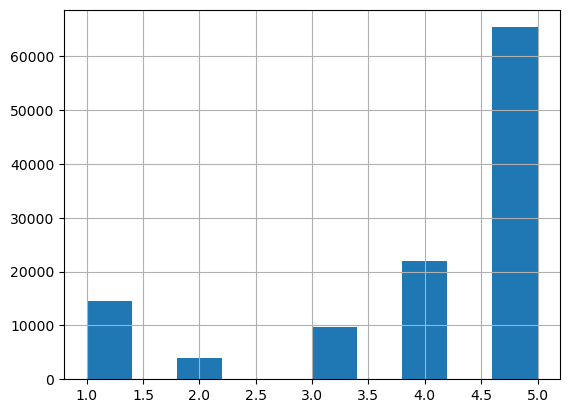

In [21]:
DF_all_tratando_00['review_score'].hist()

In [22]:
# Média arredondada.

DF_all_tratando_00['review_score'] = DF_all_tratando_00['review_score'].fillna(4.0)

C:\Users\User\AppData\Local\Temp\ipykernel_6328\1784086810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_all_tratando_00['review_score'] = DF_all_tratando_00['review_score'].fillna(4.0)


In [23]:
DF_all_tratando_00['review_score'].value_counts()

review_score
5.0    65381
4.0    22920
1.0    14553
3.0     9721
2.0     4022
Name: count, dtype: int64

In [25]:
DF_all_tratando_00.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_city', 'customer_state', 'seller_city',
       'seller_state'],
      dtype='object')

In [28]:
df_O_list = DF_all_tratando_00.rename(columns={
    'order_id': 'id_pedido',
    'customer_id': 'id_cliente',
    'order_status': 'status_pedido',
    'order_purchase_timestamp': 'timestamp_compra',
    'order_approved_at': 'timestamp_aprovacao',
    'order_delivered_carrier_date': 'data_entrega_transportadora',
    'order_delivered_customer_date': 'data_entrega_cliente',
    'order_estimated_delivery_date': 'data_entrega_estimada',
    'order_item_id': 'id_item_pedido',
    'product_id': 'id_produto',
    'seller_id': 'id_vendedor',
    'shipping_limit_date': 'data_limite_envio',
    'price': 'preco',
    'freight_value': 'valor_frete',
    'payment_sequential': 'sequencial_pagamento',
    'payment_type': 'tipo_pagamento',
    'payment_installments': 'qtde_parcelas',
    'payment_value': 'valor_pagamento',
    'review_id': 'id_review',
    'review_score': 'pontuacao_review',
    'review_creation_date': 'data_criacao_review',
    'product_category_name': 'categoria_produto',
    'product_weight_g': 'peso_produto_g',
    'product_length_cm': 'comprimento_produto_cm',
    'product_height_cm': 'altura_produto_cm',
    'product_width_cm': 'largura_produto_cm',
    'customer_unique_id': 'id_cliente_unico',
    'customer_city': 'cidade_cliente',
    'customer_state': 'estado_cliente',
    'seller_city': 'cidade_vendedor',
    'seller_state': 'estado_vendedor'
})

In [29]:
resumo_tabela(df_O_list)

Dataset Shape: (116597, 31)


,Name,dtypes,Missing,Uniques,First Value,Last Value,Entropy
0,id_pedido,object,0,97275,e481f51cbdc54678b7cc49136f2d6af7,1565f22aa9452ff278638e87cc895678,16.42
1,id_cliente,object,0,97275,9ef432eb6251297304e76186b10a928d,56772dfbcbe7df908a284ff0d53adf7d,16.42
2,status_pedido,object,0,7,delivered,delivered,0.19
3,timestamp_compra,object,0,96740,2017-10-02 10:56:33,2018-05-15 17:41:00,16.41
4,timestamp_aprovacao,object,14,88974,2017-10-02 11:07:15,2018-05-16 03:35:29,16.25
5,data_entrega_transportadora,object,1215,79811,2017-10-04 19:55:00,2018-05-16 17:20:00,16.01
6,data_entrega_cliente,object,2517,94354,2017-10-10 21:25:13,2018-05-21 14:31:41,16.38
7,data_entrega_estimada,object,0,449,2017-10-18 00:00:00,2018-05-29 00:00:00,8.47
8,id_item_pedido,float64,0,21,1.0,1.0,0.72
9,id_produto,object,0,32340,87285b34884572647811a353c7ac498a,9c1e194db1d35a79d962ea610bfe0868,13.60


In [33]:
#pd.to_csv(df_O_list)

df_O_list.to_csv("my_data.csv", index=False)

In [35]:
df = pd.read_csv('my_data.csv')
df.head(10)

,id_pedido,id_cliente,status_pedido,timestamp_compra,timestamp_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,valor_frete,sequencial_pagamento,tipo_pagamento,qtde_parcelas,valor_pagamento,id_review,pontuacao_review,data_criacao_review,categoria_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,id_cliente_unico,cidade_cliente,estado_cliente,cidade_vendedor,estado_vendedor
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,2017-08-19 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,2017-08-08 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,maua,SP
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,1.0,boleto,1.0,44.09,1bafb430e498b939f258b9c9dbdff9b1,3.0,2017-11-08 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,maua,SP
6,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,1.0,credit_card,1.0,83.69,b8238c6515192f8129081e17dc57d169,5.0,2017-08-17 00:00:00,bebes,238.0,20.0,10.0,15.0,02c9e0c05a817d4562ec0e8c90f29dba,itaquaquecetuba,SP,maua,SP
7,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,2017-08-15 02:15:13,2017-08-16 15:52:29,2017-08-25 21:59:26,2017-08-28 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 02:15:13,75.90,7.79,1.0,credit_card,2.0,83.69,186b

# Iniciando a Análise.